In [ ]:
cd ../

In [2]:
import pickle
import numpy as np
import argparse
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import pdist

import cxplain
from cxplain import MLPModelBuilder, ZeroMasking, CXPlain
from tensorflow.python.keras.losses import binary_crossentropy, categorical_crossentropy

from tensorflow.python.keras.layers import Dense, Input, Flatten, Add, Multiply, Lambda
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras import regularizers
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

from utils.explanations import calculate_robust_astute_sampled
import shap

np.random.seed(0)

/home/zulqarnain/anaconda3/envs/old_tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zulqarnain/anaconda3/envs/old_tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zulqarnain/anaconda3/envs/old_tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zulqarnain/anaconda3/envs/ol

In [3]:
datatype = 'cifar1006'
run_times = 5
prop_points = 1
calculate = True
epsilon_range = np.arange(0.01, 1.1, 0.05)
masking_operation = ZeroMasking()
loss = binary_crossentropy

In [4]:
cifar = pickle.load(open('data/cifar10_6_6_train.pkl', 'rb'))
data = cifar[1]
labels = cifar[0]
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.1, random_state=42)
x_train, x_val = np.array(x_train), np.array(x_val)
x_train, x_val = x_train.reshape((len(x_train), -1)), x_val.reshape((len(x_val), -1))
y_train_orig, y_val_orig = y_train.copy(), y_val.copy()
y_train, y_val = to_categorical(y_train), to_categorical(y_val)
input_shape = x_train.shape[-1]

In [6]:
save_astuteness_file = 'plots/cxplain_' + datatype + '_astuteness_classifiers.pk'
classifiers = ['2layer', '4layer', 'linear', 'svm']

Completing Run 1 of 5
Instructions for updating:
Colocations handled automatically by placer.


2022-05-18 11:46:10.955550: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-05-18 11:46:10.982107: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3600000000 Hz
2022-05-18 11:46:10.982446: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x5632b78495c0 executing computations on platform Host. Devices:
2022-05-18 11:46:10.982463: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>


Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.
Train on 16261 samples, validate on 1807 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
16261/16261 [==============================] - 1s 58us/sample - loss: 0.9774 - dense_1_loss: 0.7567 - all_loss: 0.0975 - lambda_1_loss: 0.1223 - val_loss: 0.8099 - val_dense_1_loss: 0.5976 - val_all_loss: 0.0970 - val_lambda_1_loss: 0.1208
Epoch 2/5
16261/16261 [==============================] - 1s 34us/sample - loss: 0.7729 - dense_1_loss: 0.5526 - all_loss: 0.0975 - lambda_1_loss: 0.1222 - val_loss: 0.7372 - val_dense_1_loss: 0.5238 - val_all_loss: 0.0964 - val_lambda_1_loss: 0.1202
Epoch 3/5
16261/16261 [==============================] - 1s 33us/sample - loss: 0.7263 - dense_1_loss: 0.5065 - all_loss: 0.0975 - lambda_1_loss: 0.1222 - val_loss: 0.6984 - val_dense_1_loss: 0.4814 - val_all_loss: 0.0951 - 

100%|█████████████████████████████████████| 22/22 [00:13<00:00,  1.60it/s]


Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 1s 72us/sample - loss: 0.9120 - dense_6_loss: 0.6966 - all_loss: 0.0917 - lambda_3_loss: 0.1232 - val_loss: 0.7839 - val_dense_6_loss: 0.5683 - val_all_loss: 0.0923 - val_lambda_3_loss: 0.1233
Epoch 2/5
16261/16261 [==============================] - 1s 42us/sample - loss: 0.7336 - dense_6_loss: 0.5185 - all_loss: 0.0918 - lambda_3_loss: 0.1232 - val_loss: 0.6998 - val_dense_6_loss: 0.4860 - val_all_loss: 0.0931 - val_lambda_3_loss: 0.1248
Epoch 3/5
16261/16261 [==============================] - 1s 43us/sample - loss: 0.6759 - dense_6_loss: 0.4609 - all_loss: 0.0918 - lambda_3_loss: 0.1234 - val_loss: 0.6638 - val_dense_6_loss: 0.4476 - val_all_loss: 0.0921 - val_lambda_3_loss: 0.1232
Epoch 4/5
16261/16261 [==============================] - 1s 43us/sample - loss: 0.6540 - dense_6_loss: 0.4388 - all_loss: 0.0917 - lambda_3_loss: 0.1232 - val_loss: 0.6461 - val_dense_6_loss: 0.4315 - 

100%|█████████████████████████████████████| 22/22 [00:21<00:00,  1.00it/s]


Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 1s 75us/sample - loss: 1.1081 - dense_8_loss: 0.7839 - all_loss: 0.1478 - lambda_5_loss: 0.1760 - val_loss: 0.8813 - val_dense_8_loss: 0.5641 - val_all_loss: 0.1446 - val_lambda_5_loss: 0.1693
Epoch 2/5
16261/16261 [==============================] - 1s 44us/sample - loss: 0.8744 - dense_8_loss: 0.5504 - all_loss: 0.1477 - lambda_5_loss: 0.1761 - val_loss: 0.8673 - val_dense_8_loss: 0.5514 - val_all_loss: 0.1451 - val_lambda_5_loss: 0.1700
Epoch 3/5
16261/16261 [==============================] - 1s 39us/sample - loss: 0.8668 - dense_8_loss: 0.5432 - all_loss: 0.1479 - lambda_5_loss: 0.1760 - val_loss: 0.8636 - val_dense_8_loss: 0.5473 - val_all_loss: 0.1454 - val_lambda_5_loss: 0.1699
Epoch 4/5
16261/16261 [==============================] - 1s 43us/sample - loss: 0.8652 - dense_8_loss: 0.5424 - all_loss: 0.1477 - lambda_5_loss: 0.1761 - val_loss: 0.8619 - val_dense_8_loss: 0.5464 - 

100%|█████████████████████████████████████| 22/22 [00:16<00:00,  1.34it/s]


Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 1s 87us/sample - loss: 2.4166 - dense_11_loss: 1.0447 - all_loss: 0.7141 - lambda_7_loss: 0.6580 - val_loss: 2.3370 - val_dense_11_loss: 0.9813 - val_all_loss: 0.7086 - val_lambda_7_loss: 0.6457
Epoch 2/5
16261/16261 [==============================] - 1s 53us/sample - loss: 2.3670 - dense_11_loss: 0.9948 - all_loss: 0.7141 - lambda_7_loss: 0.6580 - val_loss: 2.3296 - val_dense_11_loss: 0.9755 - val_all_loss: 0.7086 - val_lambda_7_loss: 0.6457
Epoch 3/5
16261/16261 [==============================] - 1s 63us/sample - loss: 2.3655 - dense_11_loss: 0.9937 - all_loss: 0.7138 - lambda_7_loss: 0.6576 - val_loss: 2.3313 - val_dense_11_loss: 0.9758 - val_all_loss: 0.7092 - val_lambda_7_loss: 0.6467
Epoch 4/5
16261/16261 [==============================] - 1s 52us/sample - loss: 2.3648 - dense_11_loss: 0.9929 - all_loss: 0.7138 - lambda_7_loss: 0.6576 - val_loss: 2.3313 - val_dense_11_loss: 0

100%|█████████████████████████████████████| 22/22 [00:19<00:00,  1.11it/s]


Completing Run 2 of 5
Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 1s 84us/sample - loss: 1.0015 - dense_13_loss: 0.7821 - all_loss: 0.0979 - lambda_9_loss: 0.1226 - val_loss: 0.8234 - val_dense_13_loss: 0.6075 - val_all_loss: 0.0950 - val_lambda_9_loss: 0.1197
Epoch 2/5
16261/16261 [==============================] - 1s 41us/sample - loss: 0.7864 - dense_13_loss: 0.5666 - all_loss: 0.0977 - lambda_9_loss: 0.1224 - val_loss: 0.7522 - val_dense_13_loss: 0.5400 - val_all_loss: 0.0952 - val_lambda_9_loss: 0.1191
Epoch 3/5
16261/16261 [==============================] - 1s 43us/sample - loss: 0.7335 - dense_13_loss: 0.5137 - all_loss: 0.0975 - lambda_9_loss: 0.1223 - val_loss: 0.7070 - val_dense_13_loss: 0.4929 - val_all_loss: 0.0953 - val_lambda_9_loss: 0.1197
Epoch 4/5
16261/16261 [==============================] - 1s 61us/sample - loss: 0.7017 - dense_13_loss: 0.4817 - all_loss: 0.0975 - lambda_9_loss: 0.1222 - val_loss: 0.6818 

100%|█████████████████████████████████████| 22/22 [00:23<00:00,  1.08s/it]


Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 2s 98us/sample - loss: 0.9131 - dense_18_loss: 0.6982 - all_loss: 0.0917 - lambda_11_loss: 0.1231 - val_loss: 0.8047 - val_dense_18_loss: 0.5888 - val_all_loss: 0.0922 - val_lambda_11_loss: 0.1234
Epoch 2/5
16261/16261 [==============================] - 1s 48us/sample - loss: 0.7574 - dense_18_loss: 0.5424 - all_loss: 0.0919 - lambda_11_loss: 0.1233 - val_loss: 0.7169 - val_dense_18_loss: 0.5054 - val_all_loss: 0.0931 - val_lambda_11_loss: 0.1238
Epoch 3/5
16261/16261 [==============================] - 1s 49us/sample - loss: 0.6971 - dense_18_loss: 0.4817 - all_loss: 0.0917 - lambda_11_loss: 0.1231 - val_loss: 0.6734 - val_dense_18_loss: 0.4568 - val_all_loss: 0.0918 - val_lambda_11_loss: 0.1229
Epoch 4/5
16261/16261 [==============================] - 1s 49us/sample - loss: 0.6662 - dense_18_loss: 0.4507 - all_loss: 0.0917 - lambda_11_loss: 0.1232 - val_loss: 0.6576 - val_dense_18_

100%|█████████████████████████████████████| 22/22 [00:23<00:00,  1.08s/it]


Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 2s 94us/sample - loss: 1.0828 - dense_20_loss: 0.7588 - all_loss: 0.1476 - lambda_13_loss: 0.1760 - val_loss: 0.8738 - val_dense_20_loss: 0.5568 - val_all_loss: 0.1449 - val_lambda_13_loss: 0.1697
Epoch 2/5
16261/16261 [==============================] - 1s 44us/sample - loss: 0.8704 - dense_20_loss: 0.5466 - all_loss: 0.1478 - lambda_13_loss: 0.1761 - val_loss: 0.8633 - val_dense_20_loss: 0.5467 - val_all_loss: 0.1453 - val_lambda_13_loss: 0.1696
Epoch 3/5
16261/16261 [==============================] - 1s 44us/sample - loss: 0.8655 - dense_20_loss: 0.5421 - all_loss: 0.1476 - lambda_13_loss: 0.1760 - val_loss: 0.8620 - val_dense_20_loss: 0.5479 - val_all_loss: 0.1454 - val_lambda_13_loss: 0.1697
Epoch 4/5
16261/16261 [==============================] - 1s 45us/sample - loss: 0.8647 - dense_20_loss: 0.5407 - all_loss: 0.1476 - lambda_13_loss: 0.1758 - val_loss: 0.8611 - val_dense_20_

100%|█████████████████████████████████████| 22/22 [00:20<00:00,  1.07it/s]


Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 2s 97us/sample - loss: 2.4160 - dense_23_loss: 1.0441 - all_loss: 0.7138 - lambda_15_loss: 0.6581 - val_loss: 2.3385 - val_dense_23_loss: 0.9825 - val_all_loss: 0.7083 - val_lambda_15_loss: 0.6450
Epoch 2/5
16261/16261 [==============================] - 1s 43us/sample - loss: 2.3659 - dense_23_loss: 0.9941 - all_loss: 0.7139 - lambda_15_loss: 0.6580 - val_loss: 2.3297 - val_dense_23_loss: 0.9757 - val_all_loss: 0.7083 - val_lambda_15_loss: 0.6457
Epoch 3/5
16261/16261 [==============================] - 1s 45us/sample - loss: 2.3647 - dense_23_loss: 0.9932 - all_loss: 0.7141 - lambda_15_loss: 0.6579 - val_loss: 2.3256 - val_dense_23_loss: 0.9685 - val_all_loss: 0.7081 - val_lambda_15_loss: 0.6448
Epoch 4/5
16261/16261 [==============================] - 1s 44us/sample - loss: 2.3642 - dense_23_loss: 0.9926 - all_loss: 0.7138 - lambda_15_loss: 0.6580 - val_loss: 2.3300 - val_dense_23_

100%|█████████████████████████████████████| 22/22 [00:20<00:00,  1.05it/s]


Completing Run 3 of 5
Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 2s 105us/sample - loss: 1.0132 - dense_25_loss: 0.7926 - all_loss: 0.0975 - lambda_17_loss: 0.1223 - val_loss: 0.8185 - val_dense_25_loss: 0.6028 - val_all_loss: 0.0954 - val_lambda_17_loss: 0.1194
Epoch 2/5
16261/16261 [==============================] - 1s 45us/sample - loss: 0.7760 - dense_25_loss: 0.5555 - all_loss: 0.0974 - lambda_17_loss: 0.1222 - val_loss: 0.7437 - val_dense_25_loss: 0.5284 - val_all_loss: 0.0960 - val_lambda_17_loss: 0.1201
Epoch 3/5
16261/16261 [==============================] - 1s 45us/sample - loss: 0.7292 - dense_25_loss: 0.5092 - all_loss: 0.0975 - lambda_17_loss: 0.1225 - val_loss: 0.7077 - val_dense_25_loss: 0.4937 - val_all_loss: 0.0959 - val_lambda_17_loss: 0.1199
Epoch 4/5
16261/16261 [==============================] - 1s 45us/sample - loss: 0.7023 - dense_25_loss: 0.4823 - all_loss: 0.0976 - lambda_17_loss: 0.1225 - val_loss:

100%|█████████████████████████████████████| 22/22 [00:20<00:00,  1.06it/s]


Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 2s 133us/sample - loss: 0.9142 - dense_30_loss: 0.6983 - all_loss: 0.0917 - lambda_19_loss: 0.1231 - val_loss: 0.7953 - val_dense_30_loss: 0.5801 - val_all_loss: 0.0924 - val_lambda_19_loss: 0.1233
Epoch 2/5
16261/16261 [==============================] - 1s 67us/sample - loss: 0.7381 - dense_30_loss: 0.5231 - all_loss: 0.0920 - lambda_19_loss: 0.1232 - val_loss: 0.6960 - val_dense_30_loss: 0.4793 - val_all_loss: 0.0918 - val_lambda_19_loss: 0.1232
Epoch 3/5
16261/16261 [==============================] - 1s 66us/sample - loss: 0.6789 - dense_30_loss: 0.4635 - all_loss: 0.0917 - lambda_19_loss: 0.1231 - val_loss: 0.6616 - val_dense_30_loss: 0.4463 - val_all_loss: 0.0925 - val_lambda_19_loss: 0.1236
Epoch 4/5
16261/16261 [==============================] - 2s 114us/sample - loss: 0.6536 - dense_30_loss: 0.4382 - all_loss: 0.0917 - lambda_19_loss: 0.1232 - val_loss: 0.6414 - val_dense_3

100%|█████████████████████████████████████| 22/22 [00:23<00:00,  1.06s/it]


Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 2s 108us/sample - loss: 1.1016 - dense_32_loss: 0.7774 - all_loss: 0.1483 - lambda_21_loss: 0.1765 - val_loss: 0.8780 - val_dense_32_loss: 0.5612 - val_all_loss: 0.1451 - val_lambda_21_loss: 0.1701
Epoch 2/5
16261/16261 [==============================] - 1s 42us/sample - loss: 0.8708 - dense_32_loss: 0.5472 - all_loss: 0.1478 - lambda_21_loss: 0.1760 - val_loss: 0.8661 - val_dense_32_loss: 0.5517 - val_all_loss: 0.1457 - val_lambda_21_loss: 0.1700
Epoch 3/5
16261/16261 [==============================] - 1s 43us/sample - loss: 0.8660 - dense_32_loss: 0.5420 - all_loss: 0.1476 - lambda_21_loss: 0.1759 - val_loss: 0.8612 - val_dense_32_loss: 0.5445 - val_all_loss: 0.1449 - val_lambda_21_loss: 0.1695
Epoch 4/5
16261/16261 [==============================] - 1s 41us/sample - loss: 0.8647 - dense_32_loss: 0.5411 - all_loss: 0.1478 - lambda_21_loss: 0.1760 - val_loss: 0.8631 - val_dense_32

100%|█████████████████████████████████████| 22/22 [00:20<00:00,  1.06it/s]


Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 2s 116us/sample - loss: 2.4148 - dense_35_loss: 1.0426 - all_loss: 0.7140 - lambda_23_loss: 0.6581 - val_loss: 2.3405 - val_dense_35_loss: 0.9842 - val_all_loss: 0.7093 - val_lambda_23_loss: 0.6463
Epoch 2/5
16261/16261 [==============================] - 1s 45us/sample - loss: 2.3677 - dense_35_loss: 0.9959 - all_loss: 0.7141 - lambda_23_loss: 0.6581 - val_loss: 2.3335 - val_dense_35_loss: 0.9796 - val_all_loss: 0.7087 - val_lambda_23_loss: 0.6454
Epoch 3/5
16261/16261 [==============================] - 1s 46us/sample - loss: 2.3648 - dense_35_loss: 0.9928 - all_loss: 0.7137 - lambda_23_loss: 0.6581 - val_loss: 2.3450 - val_dense_35_loss: 0.9894 - val_all_loss: 0.7086 - val_lambda_23_loss: 0.6460
Epoch 4/5
16261/16261 [==============================] - 1s 47us/sample - loss: 2.3652 - dense_35_loss: 0.9937 - all_loss: 0.7138 - lambda_23_loss: 0.6579 - val_loss: 2.3280 - val_dense_35

100%|█████████████████████████████████████| 22/22 [00:22<00:00,  1.02s/it]


Completing Run 4 of 5
Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 3s 183us/sample - loss: 0.9886 - dense_37_loss: 0.7689 - all_loss: 0.0980 - lambda_25_loss: 0.1226 - val_loss: 0.8150 - val_dense_37_loss: 0.5983 - val_all_loss: 0.0952 - val_lambda_25_loss: 0.1191
Epoch 2/5
16261/16261 [==============================] - 1s 84us/sample - loss: 0.7807 - dense_37_loss: 0.5602 - all_loss: 0.0975 - lambda_25_loss: 0.1222 - val_loss: 0.7444 - val_dense_37_loss: 0.5286 - val_all_loss: 0.0951 - val_lambda_25_loss: 0.1191
Epoch 3/5
16261/16261 [==============================] - 1s 83us/sample - loss: 0.7297 - dense_37_loss: 0.5091 - all_loss: 0.0974 - lambda_25_loss: 0.1221 - val_loss: 0.7028 - val_dense_37_loss: 0.4872 - val_all_loss: 0.0953 - val_lambda_25_loss: 0.1194
Epoch 4/5
16261/16261 [==============================] - 1s 92us/sample - loss: 0.6994 - dense_37_loss: 0.4795 - all_loss: 0.0976 - lambda_25_loss: 0.1224 - val_loss:

100%|█████████████████████████████████████| 22/22 [00:22<00:00,  1.00s/it]


Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 3s 169us/sample - loss: 0.9126 - dense_42_loss: 0.6969 - all_loss: 0.0917 - lambda_27_loss: 0.1231 - val_loss: 0.8069 - val_dense_42_loss: 0.5906 - val_all_loss: 0.0920 - val_lambda_27_loss: 0.1238
Epoch 2/5
16261/16261 [==============================] - 1s 65us/sample - loss: 0.7576 - dense_42_loss: 0.5426 - all_loss: 0.0919 - lambda_27_loss: 0.1232 - val_loss: 0.7299 - val_dense_42_loss: 0.5121 - val_all_loss: 0.0915 - val_lambda_27_loss: 0.1225
Epoch 3/5
16261/16261 [==============================] - 1s 57us/sample - loss: 0.7040 - dense_42_loss: 0.4886 - all_loss: 0.0918 - lambda_27_loss: 0.1236 - val_loss: 0.6880 - val_dense_42_loss: 0.4731 - val_all_loss: 0.0930 - val_lambda_27_loss: 0.1239
Epoch 4/5
16261/16261 [==============================] - 1s 64us/sample - loss: 0.6675 - dense_42_loss: 0.4521 - all_loss: 0.0917 - lambda_27_loss: 0.1232 - val_loss: 0.6562 - val_dense_42

100%|█████████████████████████████████████| 22/22 [00:26<00:00,  1.20s/it]


Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 2s 133us/sample - loss: 1.0838 - dense_44_loss: 0.7595 - all_loss: 0.1477 - lambda_29_loss: 0.1759 - val_loss: 0.8769 - val_dense_44_loss: 0.5625 - val_all_loss: 0.1461 - val_lambda_29_loss: 0.1708
Epoch 2/5
16261/16261 [==============================] - 1s 49us/sample - loss: 0.8707 - dense_44_loss: 0.5466 - all_loss: 0.1477 - lambda_29_loss: 0.1759 - val_loss: 0.8637 - val_dense_44_loss: 0.5481 - val_all_loss: 0.1449 - val_lambda_29_loss: 0.1698
Epoch 3/5
16261/16261 [==============================] - 1s 48us/sample - loss: 0.8658 - dense_44_loss: 0.5416 - all_loss: 0.1476 - lambda_29_loss: 0.1761 - val_loss: 0.8655 - val_dense_44_loss: 0.5552 - val_all_loss: 0.1465 - val_lambda_29_loss: 0.1716
Epoch 4/5
16261/16261 [==============================] - 1s 48us/sample - loss: 0.8651 - dense_44_loss: 0.5414 - all_loss: 0.1479 - lambda_29_loss: 0.1760 - val_loss: 0.8655 - val_dense_44

100%|█████████████████████████████████████| 22/22 [00:21<00:00,  1.02it/s]


Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 2s 152us/sample - loss: 2.4054 - dense_47_loss: 1.0340 - all_loss: 0.7136 - lambda_31_loss: 0.6574 - val_loss: 2.3306 - val_dense_47_loss: 0.9749 - val_all_loss: 0.7081 - val_lambda_31_loss: 0.6457
Epoch 2/5
16261/16261 [==============================] - 1s 51us/sample - loss: 2.3663 - dense_47_loss: 0.9943 - all_loss: 0.7141 - lambda_31_loss: 0.6580 - val_loss: 2.3316 - val_dense_47_loss: 0.9773 - val_all_loss: 0.7093 - val_lambda_31_loss: 0.6460
Epoch 3/5
16261/16261 [==============================] - 1s 56us/sample - loss: 2.3653 - dense_47_loss: 0.9934 - all_loss: 0.7140 - lambda_31_loss: 0.6579 - val_loss: 2.3300 - val_dense_47_loss: 0.9752 - val_all_loss: 0.7101 - val_lambda_31_loss: 0.6468
Epoch 4/5
16261/16261 [==============================] - 1s 74us/sample - loss: 2.3651 - dense_47_loss: 0.9934 - all_loss: 0.7141 - lambda_31_loss: 0.6580 - val_loss: 2.3338 - val_dense_47

100%|█████████████████████████████████████| 22/22 [00:23<00:00,  1.05s/it]


Completing Run 5 of 5
Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 2s 149us/sample - loss: 0.9766 - dense_49_loss: 0.7561 - all_loss: 0.0975 - lambda_33_loss: 0.1224 - val_loss: 0.8173 - val_dense_49_loss: 0.6041 - val_all_loss: 0.0960 - val_lambda_33_loss: 0.1202
Epoch 2/5
16261/16261 [==============================] - 1s 47us/sample - loss: 0.7825 - dense_49_loss: 0.5623 - all_loss: 0.0974 - lambda_33_loss: 0.1222 - val_loss: 0.7500 - val_dense_49_loss: 0.5338 - val_all_loss: 0.0953 - val_lambda_33_loss: 0.1191
Epoch 3/5
16261/16261 [==============================] - 1s 47us/sample - loss: 0.7361 - dense_49_loss: 0.5170 - all_loss: 0.0980 - lambda_33_loss: 0.1228 - val_loss: 0.7129 - val_dense_49_loss: 0.4971 - val_all_loss: 0.0953 - val_lambda_33_loss: 0.1193
Epoch 4/5
16261/16261 [==============================] - 1s 47us/sample - loss: 0.7089 - dense_49_loss: 0.4892 - all_loss: 0.0978 - lambda_33_loss: 0.1225 - val_loss:

100%|█████████████████████████████████████| 22/22 [00:18<00:00,  1.16it/s]


Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 3s 184us/sample - loss: 0.9149 - dense_54_loss: 0.7003 - all_loss: 0.0919 - lambda_35_loss: 0.1237 - val_loss: 0.8105 - val_dense_54_loss: 0.5949 - val_all_loss: 0.0915 - val_lambda_35_loss: 0.1225
Epoch 2/5
16261/16261 [==============================] - 1s 54us/sample - loss: 0.7355 - dense_54_loss: 0.5205 - all_loss: 0.0920 - lambda_35_loss: 0.1232 - val_loss: 0.6985 - val_dense_54_loss: 0.4853 - val_all_loss: 0.0931 - val_lambda_35_loss: 0.1241
Epoch 3/5
16261/16261 [==============================] - 1s 58us/sample - loss: 0.6759 - dense_54_loss: 0.4607 - all_loss: 0.0918 - lambda_35_loss: 0.1232 - val_loss: 0.6625 - val_dense_54_loss: 0.4479 - val_all_loss: 0.0926 - val_lambda_35_loss: 0.1235
Epoch 4/5
16261/16261 [==============================] - 1s 57us/sample - loss: 0.6527 - dense_54_loss: 0.4371 - all_loss: 0.0917 - lambda_35_loss: 0.1231 - val_loss: 0.6464 - val_dense_54

100%|█████████████████████████████████████| 22/22 [00:26<00:00,  1.19s/it]


Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 3s 165us/sample - loss: 1.1044 - dense_56_loss: 0.7802 - all_loss: 0.1479 - lambda_37_loss: 0.1759 - val_loss: 0.8775 - val_dense_56_loss: 0.5619 - val_all_loss: 0.1451 - val_lambda_37_loss: 0.1699
Epoch 2/5
16261/16261 [==============================] - 1s 50us/sample - loss: 0.8708 - dense_56_loss: 0.5469 - all_loss: 0.1476 - lambda_37_loss: 0.1762 - val_loss: 0.8647 - val_dense_56_loss: 0.5484 - val_all_loss: 0.1452 - val_lambda_37_loss: 0.1698
Epoch 3/5
16261/16261 [==============================] - 1s 50us/sample - loss: 0.8653 - dense_56_loss: 0.5415 - all_loss: 0.1478 - lambda_37_loss: 0.1763 - val_loss: 0.8655 - val_dense_56_loss: 0.5498 - val_all_loss: 0.1453 - val_lambda_37_loss: 0.1707
Epoch 4/5
16261/16261 [==============================] - 1s 50us/sample - loss: 0.8647 - dense_56_loss: 0.5406 - all_loss: 0.1475 - lambda_37_loss: 0.1758 - val_loss: 0.8601 - val_dense_56

100%|█████████████████████████████████████| 22/22 [00:21<00:00,  1.00it/s]


Train on 16261 samples, validate on 1807 samples
Epoch 1/5
16261/16261 [==============================] - 3s 169us/sample - loss: 2.4305 - dense_59_loss: 1.0588 - all_loss: 0.7138 - lambda_39_loss: 0.6578 - val_loss: 2.3346 - val_dense_59_loss: 0.9789 - val_all_loss: 0.7092 - val_lambda_39_loss: 0.6464
Epoch 2/5
16261/16261 [==============================] - 1s 54us/sample - loss: 2.3675 - dense_59_loss: 0.9961 - all_loss: 0.7136 - lambda_39_loss: 0.6579 - val_loss: 2.3305 - val_dense_59_loss: 0.9741 - val_all_loss: 0.7101 - val_lambda_39_loss: 0.6474
Epoch 3/5
16261/16261 [==============================] - 1s 46us/sample - loss: 2.3655 - dense_59_loss: 0.9940 - all_loss: 0.7138 - lambda_39_loss: 0.6577 - val_loss: 2.3321 - val_dense_59_loss: 0.9770 - val_all_loss: 0.7077 - val_lambda_39_loss: 0.6450
Epoch 4/5
16261/16261 [==============================] - 1s 51us/sample - loss: 2.3653 - dense_59_loss: 0.9939 - all_loss: 0.7134 - lambda_39_loss: 0.6574 - val_loss: 2.3302 - val_dense_59

100%|█████████████████████████████████████| 22/22 [00:22<00:00,  1.00s/it]


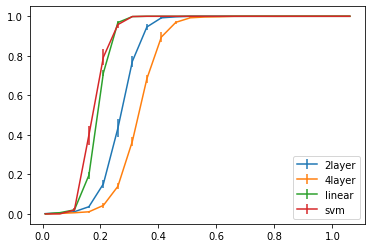

In [7]:
if calculate:
    median_rad = np.median(pdist(x_train))
    total_astuteness = np.zeros(shape=(run_times, len(classifiers), len(epsilon_range)))
    for i in range(run_times):
        print('Completing Run ' + str(i + 1) + ' of ' + str(run_times))
        for j in range(len(classifiers)):
            if classifiers[j] == '2layer':
                activation = 'relu'

                model_input = Input(shape=(input_shape,), dtype='float32')

                net = Dense(32, activation=activation, name='dense1',
                            kernel_regularizer=regularizers.l2(1e-3))(model_input)

                preds = Dense(10, activation='softmax', name='dense3',
                              kernel_regularizer=regularizers.l2(1e-3))(net)
                bbox_model = Model(model_input, preds)
                bbox_model.load_weights('models/' + datatype + '_blackbox.hdf5',
                                        by_name=True)
                pred_model = Model(model_input, preds)
                
                model_builder = MLPModelBuilder(num_layers=1, num_units=32, activation=activation, verbose=1,
                        batch_size=32, learning_rate=0.001, num_epochs=5, early_stopping_patience=15,
                        with_bn=False)


            elif classifiers[j] == '4layer':
                activation = 'relu'

                model_input = Input(shape=(input_shape,), dtype='float32')

                net = Dense(32, activation=activation, name='dense1',
                            kernel_regularizer=regularizers.l2(1e-3))(model_input)
                net = Dense(32, activation=activation, name='dense2',
                            kernel_regularizer=regularizers.l2(1e-3))(net)
                net = Dense(32, activation=activation, name='dense3',
                            kernel_regularizer=regularizers.l2(1e-3))(net)
                net = Dense(32, activation=activation, name='dense4',
                            kernel_regularizer=regularizers.l2(1e-3))(net)
                preds = Dense(10, activation='softmax', name='dense5',
                              kernel_regularizer=regularizers.l2(1e-3))(net)
                bbox_model = Model(model_input, preds)
                bbox_model.load_weights('models/' + datatype + '_blackbox_extra.hdf5',
                                        by_name=True)
                pred_model = Model(model_input, preds)
                model_builder = MLPModelBuilder(num_layers=4, num_units=32, activation=activation, verbose=1,
                                batch_size=32, learning_rate=0.001, num_epochs=5, early_stopping_patience=15,
                                with_bn=False)


            elif classifiers[j] == 'linear':
                activation = None

                model_input = Input(shape=(input_shape,), dtype='float32')

                net = Dense(32, activation=activation, name='dense1',
                            kernel_regularizer=regularizers.l2(1e-3))(model_input)
                preds = Dense(10, activation='softmax', name='dense3',
                              kernel_regularizer=regularizers.l2(1e-3))(net)
                bbox_model = Model(model_input, preds)
                bbox_model.load_weights('models/' + datatype + '_blackbox_linear.hdf5',
                                        by_name=True)
                pred_model = Model(model_input, preds)
                model_builder = MLPModelBuilder(num_layers=1, num_units=32, activation=activation, verbose=1,
                                        batch_size=32, learning_rate=0.001, num_epochs=5, early_stopping_patience=15,
                                        with_bn=False)
            elif classifiers[j] == 'svm':
                pred_model = pickle.load(open('models/' + datatype + '_svm.pk', 'rb'))
                model_builder = MLPModelBuilder(num_layers=2, num_units=32, activation=activation, verbose=1,
                                                batch_size=32, learning_rate=0.001, num_epochs=5, 
                                                early_stopping_patience=15,
                                                with_bn=False)
            if classifiers[j] == 'svm':
                explainer = CXPlain(pred_model, model_builder, masking_operation, loss, num_models=1)
                explainer.fit(x_train, y_train)
                for k in tqdm(range(len(epsilon_range))):
                    _, total_astuteness[i, j, k], _ = calculate_robust_astute_sampled(data=x_val,
                                                                                      explainer=explainer,
                                                                                      explainer_type='cxplain',
                                                                                      explanation_type='attribution',
                                                                                      ball_r=median_rad,
                                                                                      epsilon=epsilon_range[k],
                                                                                      num_points=int(
                                                                                          prop_points * len(
                                                                                              x_val)),
                                                                                      NN=False,
                                                                                      data_explanation=None)
            else:
                explainer = CXPlain(pred_model, model_builder, masking_operation, loss, num_models=1)
                explainer.fit(x_train, y_train)
                for k in tqdm(range(len(epsilon_range))):
                    _, total_astuteness[i, j, k], _ = calculate_robust_astute_sampled(data=x_val,
                                                                                      explainer=explainer,
                                                                                      explainer_type='cxplain',
                                                                                      explanation_type='attribution',
                                                                                      ball_r=median_rad,
                                                                                      epsilon=epsilon_range[k],
                                                                                      num_points=int(
                                                                                          prop_points * len(
                                                                                              x_val)),
                                                                                      NN=True,
                                                                                      data_explanation=None)
    pickle.dump(total_astuteness, open(save_astuteness_file, 'wb'))
else:
    total_astuteness = pickle.load(open(save_astuteness_file, 'rb'))
astuteness_mean = total_astuteness.mean(axis=0)
astuteness_std = total_astuteness.std(axis=0)
image_name = 'plots/cxplain_' + datatype + '_astuteness_classifiers.PNG'
fig, ax = plt.subplots()
for i in range(len(classifiers)):
    ax.errorbar(x=epsilon_range, y=astuteness_mean[i, :], yerr=astuteness_std[i, :],
                label=classifiers[i])
plt.legend()
plt.savefig(image_name)
plt.show()
plt.close()

In [8]:
x_train.shape

(18068, 10)

In [9]:
x_val.shape

(951, 10)